In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import warnings
warnings.filterwarnings("ignore")

# Load data

In [2]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**** Let's explore each column****
1. 'age' - age in year
1. 'sex'- male and female (1 and 0)
1. 'cp' - chest pain type (0,1,2,3)
1. 'trestbps' - resting blood pressure (in mm Hg on admission to the hospital)
1. 'chol' - serum cholestoral in mg/dl
1. 'fbs'- (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
1. 'restecg' - resting electrocardiographic results
1. 'thalach' - maximum heart rate achieved
1. 'exang' - exercise induced angina (1 = yes; 0 = no)
1. 'oldpeak' - ST depression induced by exercise relative to rest
1. 'slope' - the slope of the peak exercise ST segment
1. 'ca' - number of major vessels (0-3) colored by flourosopy
1. 'thal' - 3 = normal; 6 = fixed defect; 7 = reversable defect
1. 'target' - (Yes = 1, No = 0)

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Explore the data

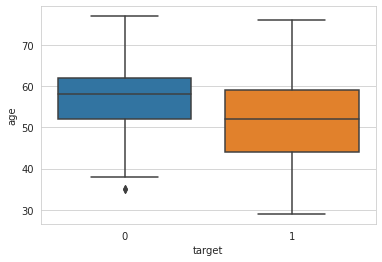

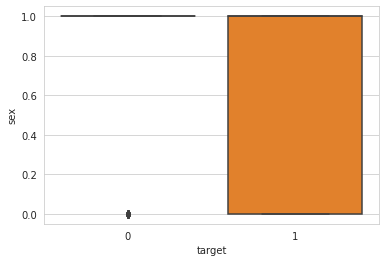

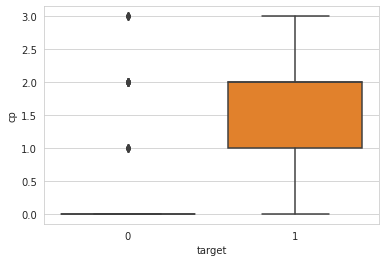

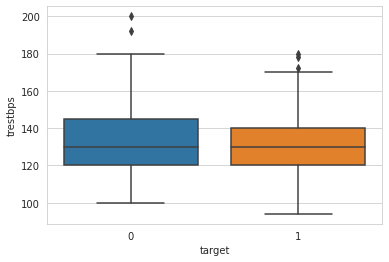

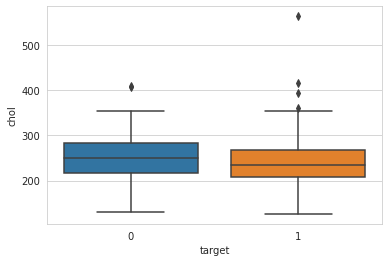

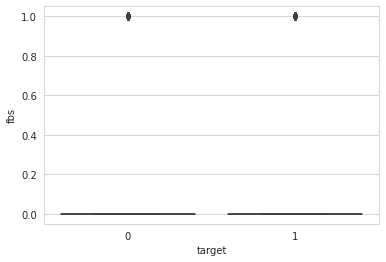

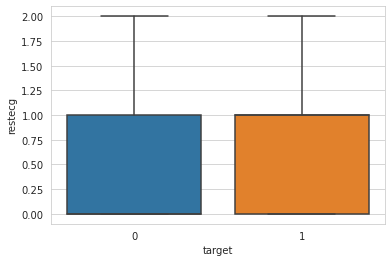

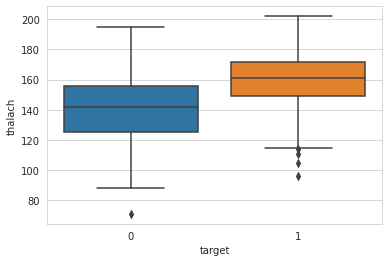

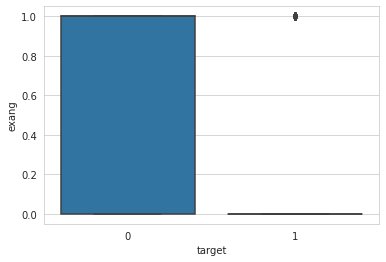

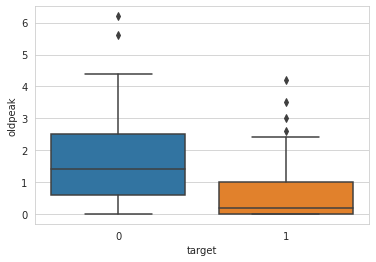

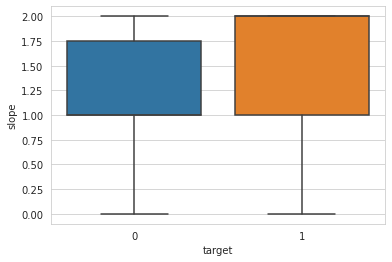

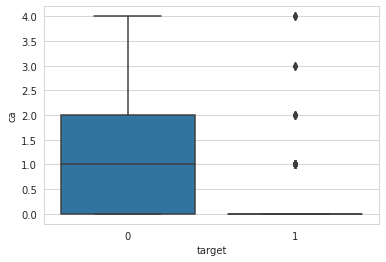

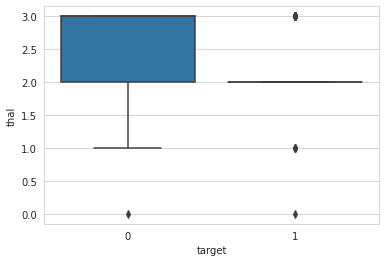

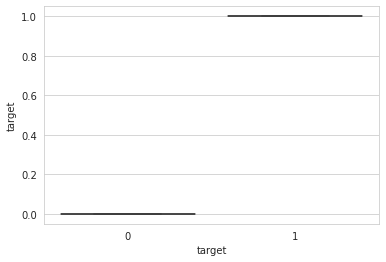

In [4]:
def plot_box(data, cols, col_x = 'target'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
        
num_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
plot_box(data, num_cols)

In [5]:
#from box plot.Drop columns 'fbs','restecg'
data.drop(['fbs','restecg'],axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Chek missing value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Feature Extraction

In [7]:
#extract the data

def extract_data(dataset):

    #extract columns 'age'
    dataset.loc[ dataset['age'] <= 40, 'age'] = 0
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 50), 'age'] = 1
    dataset.loc[(dataset['age'] > 50) & (dataset['age'] <= 60), 'age'] = 2
    dataset.loc[(dataset['age'] > 60) & (dataset['age'] <= 70), 'age'] = 3
    dataset.loc[dataset['age'] > 70,'age'] = 4
        
    #extract columns 'trestbps'
    dataset.loc[ dataset['trestbps'] <= 116, 'trestbps'] = 0
    dataset.loc[(dataset['trestbps'] > 116) & (dataset['trestbps'] <= 138), 'trestbps'] = 1
    dataset.loc[(dataset['trestbps'] > 138) & (dataset['trestbps'] <= 150), 'trestbps'] = 2
    dataset.loc[(dataset['trestbps'] > 150) & (dataset['trestbps'] <= 172), 'trestbps'] = 3
    dataset.loc[dataset['trestbps'] > 172,'trestbps'] = 4
    
    #extract columns 'chol'
    dataset.loc[dataset['chol'] <= 214, 'chol'] = 0            
    dataset.loc[(dataset['chol'] > 214) & (dataset['chol'] <= 302), 'chol'] = 1      
    dataset.loc[(dataset['chol'] > 302) & (dataset['chol'] <= 390), 'chol'] = 2
    dataset.loc[(dataset['chol'] > 390) & (dataset['chol'] <= 478), 'chol'] = 3     
    dataset.loc[dataset['chol'] > 478,'chol'] = 4
    
     #extract columns 'thalach'
    dataset.loc[ dataset['thalach'] <= 98, 'thalach'] = 0            
    dataset.loc[(dataset['thalach'] > 98) & (dataset['thalach'] <= 125), 'thalach'] = 1      
    dataset.loc[(dataset['thalach'] > 125) & (dataset['thalach'] <= 152), 'thalach'] = 2
    dataset.loc[(dataset['thalach'] > 152) & (dataset['thalach'] <= 179), 'thalach'] = 3     
    dataset.loc[dataset['thalach'] > 179,'thalach'] = 4
    
    return dataset
                
extract_data(data)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,1,3,2,1,1,0,2,0,2.3,0,0,1,1
1,0,1,2,1,1,0,1,4,0,3.5,0,0,2,1
2,1,0,1,1,0,0,0,3,0,1.4,2,0,2,1
3,2,1,1,1,1,0,1,3,0,0.8,2,0,2,1
4,2,0,0,1,2,0,1,3,1,0.6,2,0,2,1


**Import Train Test Split**

In [8]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-2]
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


**Train Model  ******

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

def logisticregression(train,test):
 model = LogisticRegression(random_state=0).fit(train, y_train)
 y_train_pred = model.predict(train)
 y_test_pred = model.predict(test) 
 train_score = accuracy_score(y_train, y_train_pred)
 test_score = accuracy_score(y_test, y_test_pred)
 matrix = confusion_matrix(y_test, y_test_pred)
 print('Logistic Regression')
 print(matrix)
 print('Train accuracy is',train_score )
 print('Test accuracy is',test_score )
    
def decisiontree(train,test):
 model = tree.DecisionTreeClassifier(criterion = 'entropy')
 model = model.fit(train,y_train)
 y_train_pred = model.predict(train)
 y_test_pred = model.predict(test)
 train_score = accuracy_score(y_train , y_train_pred)
 test_score = accuracy_score(y_test, y_test_pred)
 matrix = confusion_matrix(y_test, y_test_pred)
 print('\n','Decision Tree')
 print(matrix)
 print('Train accuracy is',train_score )
 print('Test accuracy is',test_score )
    
def naivebays(train,test):
 model = GaussianNB()
 model = model.fit(train,y_train)
 y_train_pred = model.predict(train)
 y_test_pred = model.predict(test)
 train_score = accuracy_score(y_train , y_train_pred)
 test_score = accuracy_score(y_test, y_test_pred)
 matrix = confusion_matrix(y_test, y_test_pred)
 print('\n','Naive Bayes')
 print(matrix)
 print('Train accuracy is',train_score )
 print('Test accuracy is',test_score )    
    
def randomforest(train,test):
 model = RandomForestClassifier(n_estimators=100,max_depth=4,criterion='gini')
 model = model.fit(train,y_train)
 y_train_pred = model.predict(train)
 y_test_pred = model.predict(test)
 train_score = accuracy_score(y_train , y_train_pred)
 test_score = accuracy_score(y_test, y_test_pred)
 matrix = confusion_matrix(y_test, y_test_pred)
 print('\n','Random Forest')
 print(matrix)
 print('Train accuracy is',train_score )
 print('Test accuracy is',test_score )   


logisticregression(x_train,x_test)
decisiontree(x_train,x_test)
naivebays(x_train,x_test)  
randomforest(x_train,x_test)

Logistic Regression
[[20  7]
 [ 4 30]]
Train accuracy is 0.8223140495867769
Test accuracy is 0.819672131147541

 Decision Tree
[[16 11]
 [ 6 28]]
Train accuracy is 1.0
Test accuracy is 0.7213114754098361

 Naive Bayes
[[19  8]
 [ 6 28]]
Train accuracy is 0.8264462809917356
Test accuracy is 0.7704918032786885

 Random Forest
[[19  8]
 [ 4 30]]
Train accuracy is 0.9008264462809917
Test accuracy is 0.8032786885245902


Then I use RandomForest because that's highest accuracy.

Then I will train model agina with RandomForestClassifier but before I train model,
I will optimize parameters by using GridSearchCV.